In [2]:
# Cell 1: Import Libraries and Generate Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# 1. Create Synthetic Data (Retail Sales)
# Generating 2 years of daily sales data
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", end="2024-12-31", freq='D')
sales = []
base_sales = 1000  # Baseline sales

for date in dates:
    # Add trend (slight increase over time)
    trend = (date - dates[0]).days * 0.5 
    
    # Add seasonality (higher on weekends)
    seasonality = 200 if date.weekday() >= 5 else 0
    
    # Add simple yearly seasonality (higher in Dec/Nov)
    yearly_bump = 300 if date.month in [11, 12] else 0
    
    # Random noise
    noise = np.random.normal(0, 50)
    
    value = base_sales + trend + seasonality + yearly_bump + noise
    sales.append(value)

# Create DataFrame
df = pd.DataFrame({'Date': dates, 'Sales': sales})
print("Dataset Created Successfully!")
print(df.head())

# Save to CSV (Simulating a real file)
df.to_csv('retail_sales.csv', index=False)

Dataset Created Successfully!
        Date        Sales
0 2023-01-01  1224.835708
1 2023-01-02   993.586785
2 2023-01-03  1033.384427
3 2023-01-04  1077.651493
4 2023-01-05   990.292331


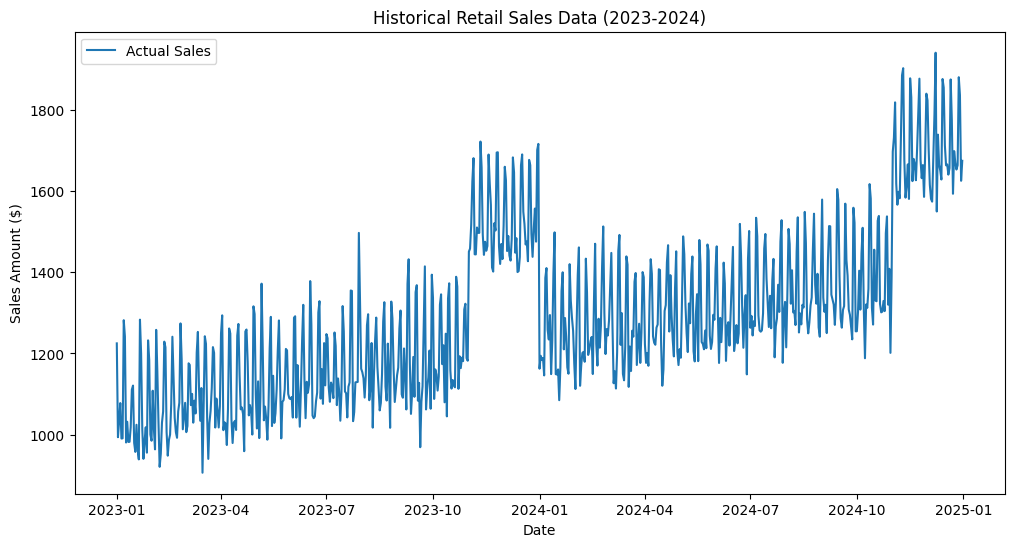

In [3]:
# Cell 2: Visualize Historical Data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=df, label='Actual Sales')
plt.title('Historical Retail Sales Data (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Sales Amount ($)')
plt.legend()
plt.show()

c:\Users\SUMUKH\Desktop\FUTURE_ML_01\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
20:18:49 - cmdstanpy - INFO - Chain [1] start processing
20:18:50 - cmdstanpy - INFO - Chain [1] done processing


            ds         yhat   yhat_lower   yhat_upper
816 2025-03-27  1404.408003  1336.366821  1476.473798
817 2025-03-28  1419.442043  1346.539341  1486.885689
818 2025-03-29  1613.754888  1545.063269  1684.830885
819 2025-03-30  1617.748388  1549.670874  1694.045607
820 2025-03-31  1418.916726  1348.364846  1489.808046


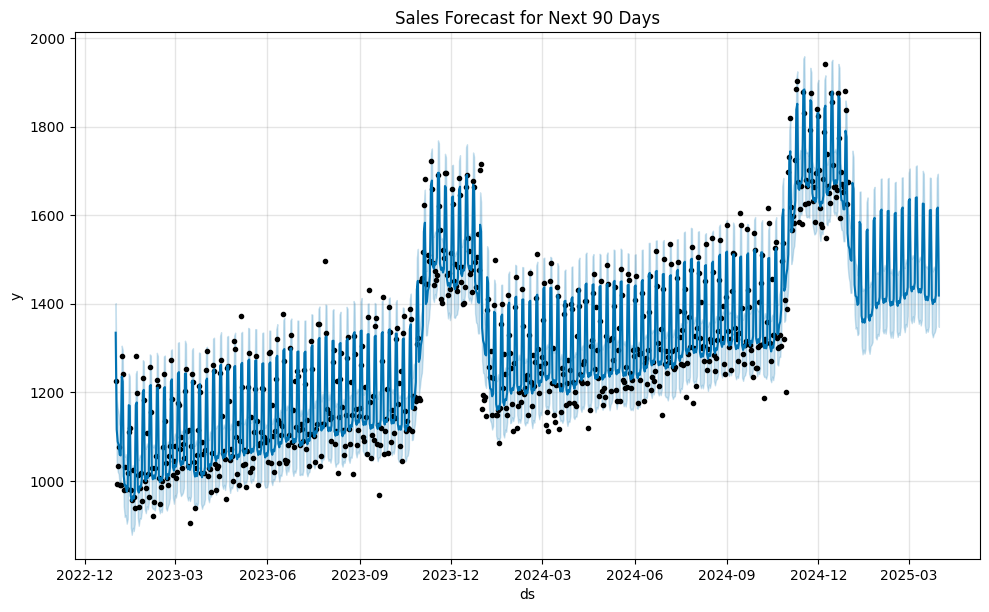

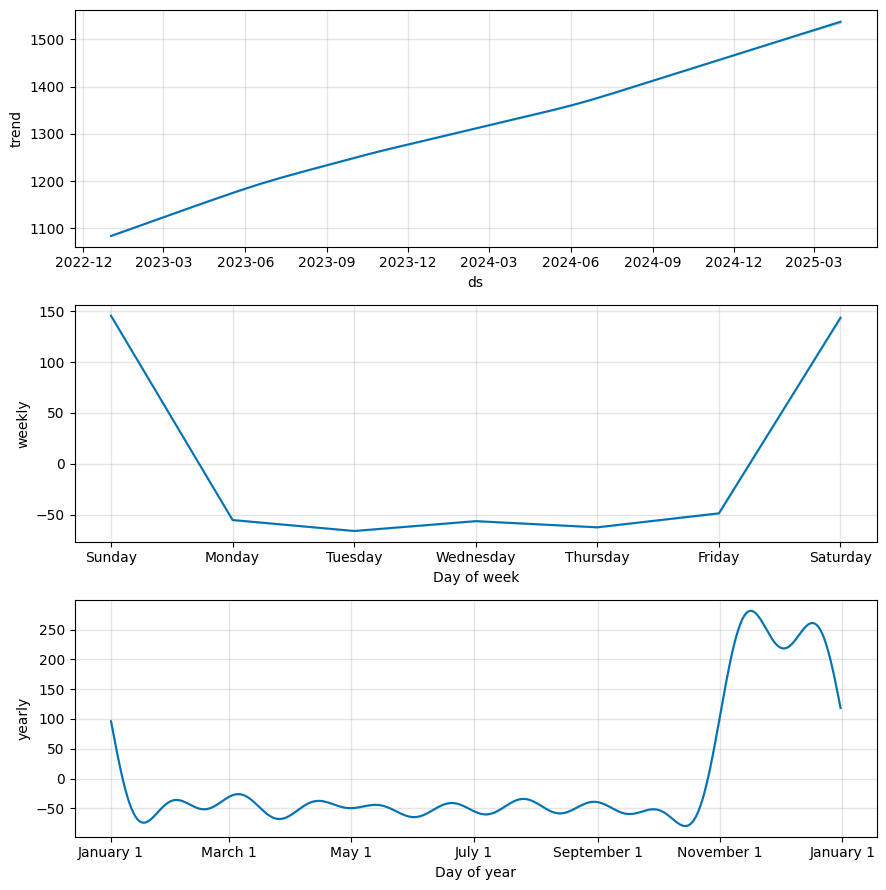

In [4]:
# Cell 3: Forecasting with Prophet
from prophet import Prophet

# Prophet requires columns to be named 'ds' (Date) and 'y' (Value)
prophet_df = df.rename(columns={'Date': 'ds', 'Sales': 'y'})

# Initialize and fit the model
model = Prophet()
model.fit(prophet_df)

# Create future dates (forecasting next 90 days)
future = model.make_future_dataframe(periods=90)

# Predict
forecast = model.predict(future)

# Display the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Sales Forecast for Next 90 Days')
plt.show()

# Plot components (Trend vs Seasonality)
fig2 = model.plot_components(forecast)
plt.show()

In [5]:
# Create a cleaner dataframe with just Date, Prediction, and Uncertainty intervals
submission = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Rename columns for clarity (optional but good for reports)
submission.columns = ['Date', 'Predicted_Sales', 'Lower_Bound', 'Upper_Bound']

# Save to CSV
submission.to_csv('Task1_Sales_Forecast_Output.csv', index=False)

print("✅ File saved as 'Task1_Sales_Forecast_Output.csv'. Task 1 is complete!")

✅ File saved as 'Task1_Sales_Forecast_Output.csv'. Task 1 is complete!


In [12]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

# 1. LOAD FRESH DATA from the file (ignoring the broken 'df' variable)
# We use a new name 'df_calc' to be safe
df_calc = pd.read_csv('retail_sales.csv')

# 2. RENAME columns to match Prophet's requirements (Date -> ds, Sales -> y)
# We assume the first column is Date and the second is Sales
df_calc.columns = ['ds', 'y']
df_calc['ds'] = pd.to_datetime(df_calc['ds'])

# 3. GET FRESH PREDICTIONS (just to be safe)
forecast = model.predict(future)

# 4. CALCULATE ERROR
# We merge the fresh data with the forecast
metric_df = forecast.set_index('ds')[['yhat']].join(df_calc.set_index('ds').y).dropna()
mae = mean_absolute_error(metric_df.y, metric_df.yhat)

print("------------------------------------------------")
print(f"✅ FINAL SUCCESS! Mean Absolute Error: {mae:.2f}")
print("------------------------------------------------")

------------------------------------------------
✅ FINAL SUCCESS! Mean Absolute Error: 42.66
------------------------------------------------


In [13]:
import pandas as pd

# 1. Load your original data (History)
df_history = pd.read_csv('retail_sales.csv')
df_history.columns = ['Date', 'Sales']
df_history['Type'] = 'Historical' # Label this as history

# 2. Load your Forecast data (Future)
# We use the prediction dataframe 'forecast' you already created
df_future = forecast[['ds', 'yhat']].tail(90) # Take only the future 90 days
df_future.columns = ['Date', 'Sales']
df_future['Type'] = 'Forecast' # Label this as forecast

# 3. Combine them
final_df = pd.concat([df_history, df_future], ignore_index=True)

# 4. Save for Power BI
final_df.to_csv('PowerBI_Source_Data.csv', index=False)

print("✅ Data ready for Power BI: 'PowerBI_Source_Data.csv' created.")

✅ Data ready for Power BI: 'PowerBI_Source_Data.csv' created.
